In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [15]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [16]:
df.isnull().sum() #no null values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [17]:
df.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

#### No January or April months

In [18]:
#changing the month to be int

import calendar

def monthtoInt(m):
    months = {
        'Jan' : 1,
        'Feb' : 2,
        'Mar' : 3,
        'Apr' : 4,
        'May' : 5,
        'June' : 6,
        'Jul' : 7,
        'Aug' : 8,
        'Sep' : 9,
        'Oct' : 10,
        'Nov' : 11,
        'Dec' : 12
    }
    return months[m]

df_cleaned = df

df_cleaned['Month'] = df_cleaned['Month'].apply(monthtoInt)
df_cleaned.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


## Exploring the Data

### No. of sessions that end in a purchase per month

<Axes: xlabel='Month'>

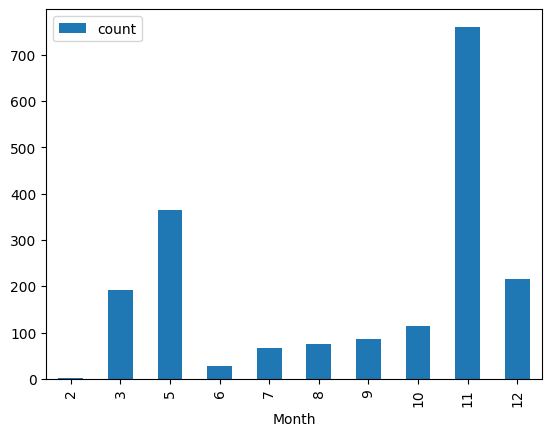

In [19]:
# no of sessions per month that have revenue = true
month_rev = df.query("Revenue==True").groupby('Month')[['Month']].value_counts() 
df_month_rev = month_rev.to_frame()
df_month_rev.plot.bar()

### Total no. of sessions per month

<Axes: xlabel='Month'>

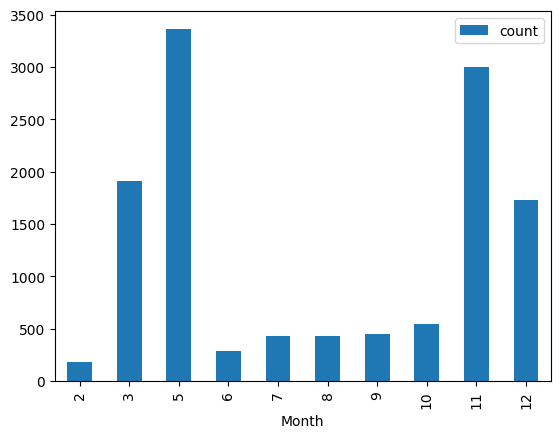

In [20]:
month = df_cleaned.groupby('Month')[['Month']].value_counts() 
df_month = month.to_frame()
df_month.plot.bar()

In [21]:
print ("Rows     : " ,df_cleaned.shape[0])
print ("Columns  : " ,df_cleaned.shape[1])
print ("\nFeatures : \n" ,df_cleaned.columns.tolist())
print ("\nMissing values :  ", df_cleaned.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_cleaned
       .nunique())

Rows     :  12330
Columns  :  18

Features : 
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Missing values :   0

Unique values :  
 Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


In [22]:
sns.heatmap(df_cleaned.corr())

ValueError: could not convert string to float: 'Returning_Visitor'

### Revenue per month

<Axes: xlabel='Month', ylabel='count'>

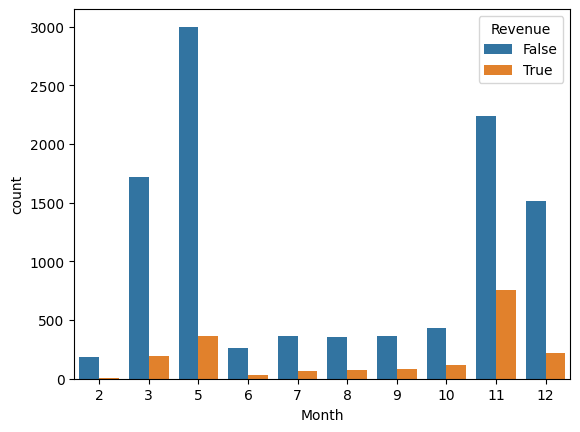

In [23]:
sns.countplot(data=df_cleaned, x="Month", hue="Revenue") # revenue per month


### Revenue on weekends or not

<Axes: xlabel='Weekend', ylabel='count'>

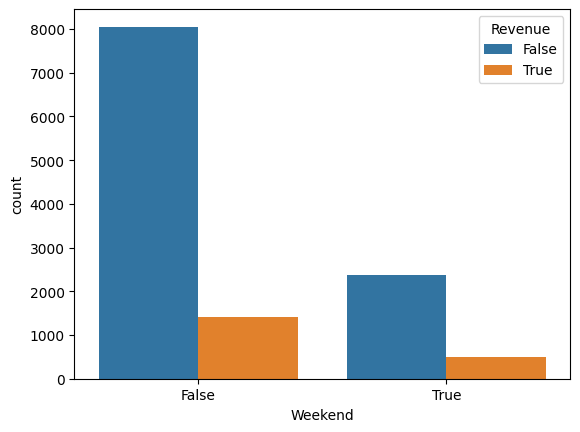

In [24]:
sns.countplot(data=df_cleaned, x="Weekend", hue="Revenue") 

### Revenue based on how close it is to a special day

<Axes: xlabel='SpecialDay', ylabel='count'>

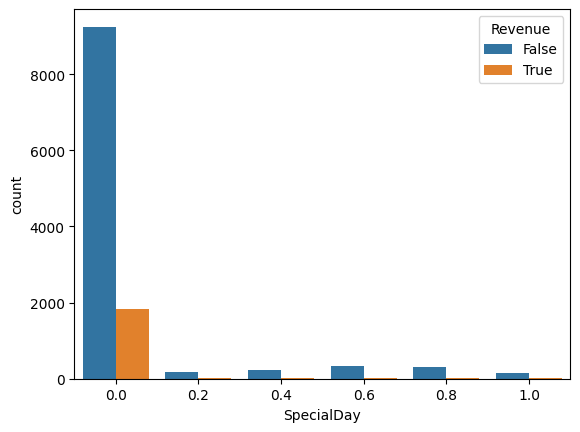

In [25]:
sns.countplot(data=df_cleaned, x="SpecialDay", hue="Revenue") 


NOTE: Special Day is 0 if it is on the day before or after a special day (i.e. Feb 13 or Feb 15) and nonzero otherwise.

From the source:
The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

In [26]:
#sum of duration on admin, info, product pages
df_duration = df_cleaned[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].sum()
df_duration_month = df_cleaned.groupby('Month')[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].sum()

df_duration.head()



Administrative_Duration    9.964935e+05
Informational_Duration     4.250447e+05
ProductRelated_Duration    1.473122e+07
dtype: float64

### Duration based on website type (Administrative, Informational, ProductRelated)

<Axes: >

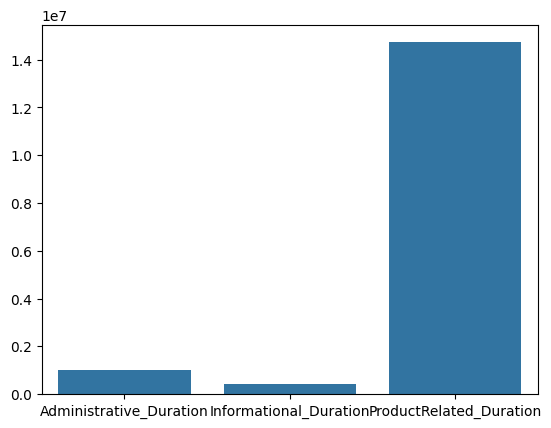

In [27]:
sns.barplot(data=df_duration) 

### Duration based on website type per month

In [28]:
df_duration_month.info()
df_duration_month.head(12)

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2 to 12
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative_Duration  10 non-null     float64
 1   Informational_Duration   10 non-null     float64
 2   ProductRelated_Duration  10 non-null     float64
dtypes: float64(3)
memory usage: 320.0 bytes


,Administrative_Duration,Informational_Duration,ProductRelated_Duration
Month,,,
2,3104.525000,439.000000,8.666670e+04
3,135838.483159,58494.868338,1.549024e+06
5,233703.101976,91376.868009,3.303088e+06
6,17029.424392,5889.823333,3.494527e+05
7,34073.722728,19664.816667,5.260049e+05
8,46208.585717,15377.720000,5.510590e+05
9,48977.792121,16010.101905,5.615179e+05
10,69140.700580,21228.142381,6.132207e+05
11,272618.063249,130817.544862,5.271677e+06


### Administrative Duration per month

<Axes: xlabel='Month', ylabel='Administrative_Duration'>

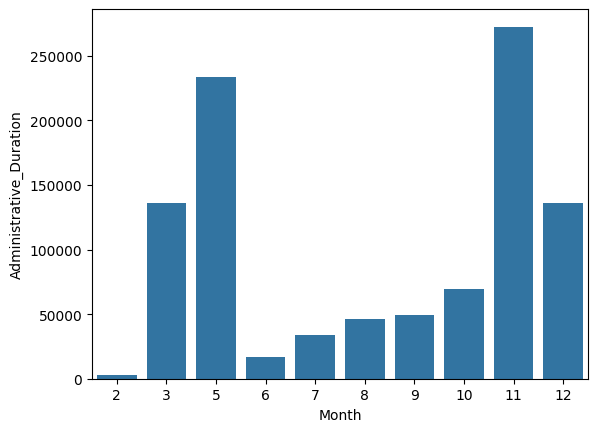

In [29]:
sns.barplot(data=df_duration_month, x='Month', y='Administrative_Duration') # duration based on website type


### Informational Duration per month

<Axes: xlabel='Month', ylabel='Informational_Duration'>

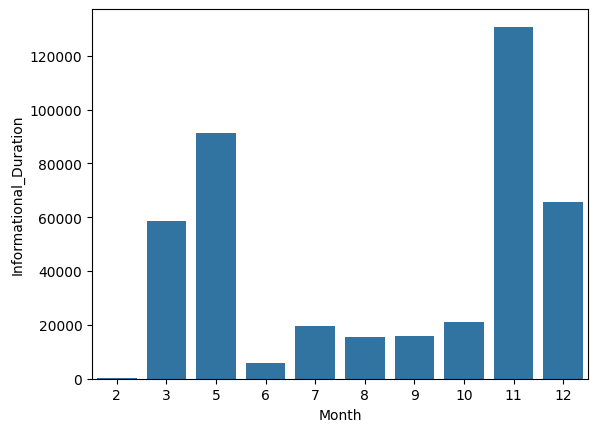

In [42]:
sns.barplot(data=df_duration_month, x='Month', y='Informational_Duration') # duration based on website type



### Product related duration per month

<Axes: xlabel='Month', ylabel='ProductRelated_Duration'>

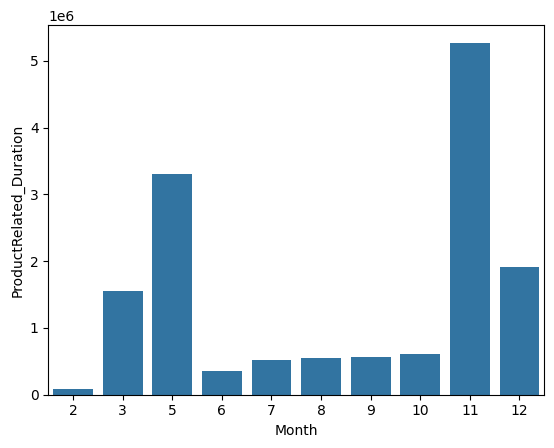

In [32]:
sns.barplot(data=df_duration_month, x='Month', y='ProductRelated_Duration') # duration based on website type

In [33]:
# Converting Data to readable format

df = pd.read_csv("online_shoppers_intention.csv")

visitor_type = df['VisitorType']
Weekend = df['Weekend']
Revenue = df['Revenue']
Month = df['Month']

def transform_visitorTypeColumn(x):
    if (x == "Returning_Visitor"):
        return 1
    if (x == "New_Visitor"):
        return 2
    if (x == "Other"):
        return 0

new_visitor_type_column = visitor_type.apply(transform_visitorTypeColumn)
df['VisitorType'] = new_visitor_type_column

def boolToInt(x):
    if (x == True):
        return 0
    if (x == False):
        return 1

new_weekend = Weekend.apply(boolToInt)
df['Weekend'] = new_weekend

new_Revenue = Revenue.apply(boolToInt)
df['Revenue'] = new_Revenue

def dateToInt(x):
    if (x == "Jan"):
        return 1
    if (x == "Feb"):
        return 2
    if (x == "Mar"):
        return 3
    if (x == "April"):
        return 4
    if (x == "May"):
        return 5
    if (x == "June"):
        return 6
    if (x == "Jul"):
        return 7
    if (x == "Aug"):
        return 8
    if (x == "Sep"):
        return 9
    if (x == "Oct"):
        return 10
    if (x == "Nov"):
        return 11
    if (x == "Dec"):
        return 12

new_month = Month.apply(dateToInt)
df['Month'] = new_month

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,1,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,1,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,1,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,1,1


### Bounce rates per month

<Axes: xlabel='Month', ylabel='BounceRates'>

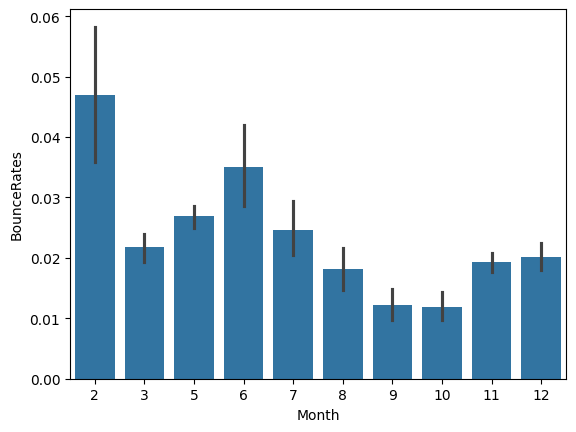

In [39]:
sns.barplot(data=df, x='Month', y='BounceRates') #BounceRates in relation to how long a user stays on a product related page

### Exit rates per month

<Axes: xlabel='Month', ylabel='ExitRates'>

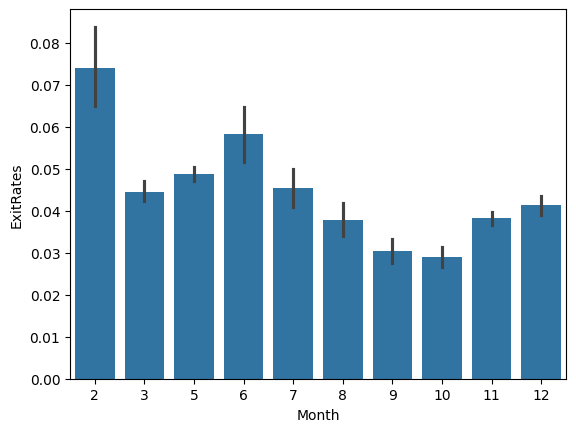

In [41]:
sns.barplot(data=df, x='Month', y='ExitRates') #ExitRates in relation to how long a user stays on a product related page

### Returning Visitor per month

<Axes: xlabel='Month'>

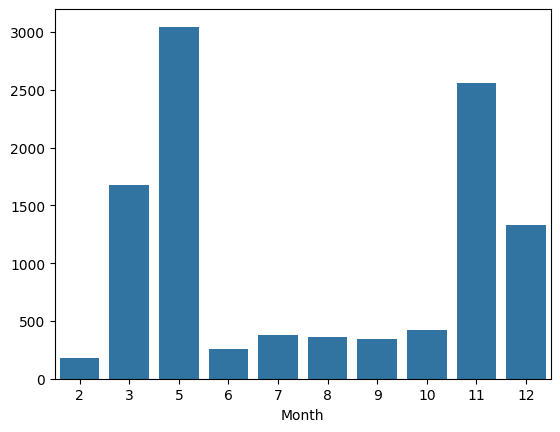

In [55]:
returning_visitors_per_month = df[df['VisitorType'] == 1].groupby('Month')['VisitorType'].count()
sns.barplot(x=returning_visitors_per_month.index, y=returning_visitors_per_month.values) #Returning Customers in relation to how long a user stays on a product related page

### New Visitor per month

<Axes: xlabel='Month'>

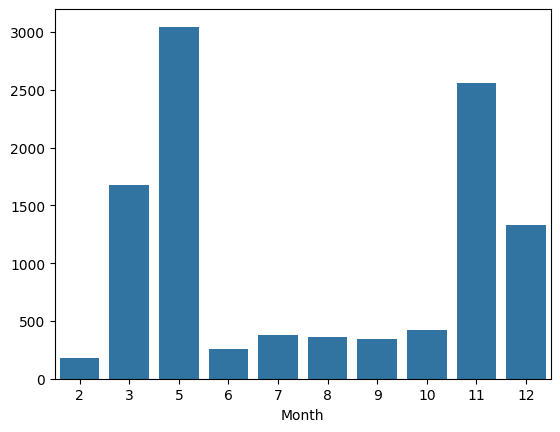

In [58]:
new_visitors_per_month = df[df['VisitorType'] == 0].groupby('Month')['VisitorType'].count()
sns.barplot(x=returning_visitors_per_month.index, y=returning_visitors_per_month.values) #Returning Customers in relation to how long a user stays on a product related page

### Returning Visitor Total Revenue

count    10551
dtype: int64

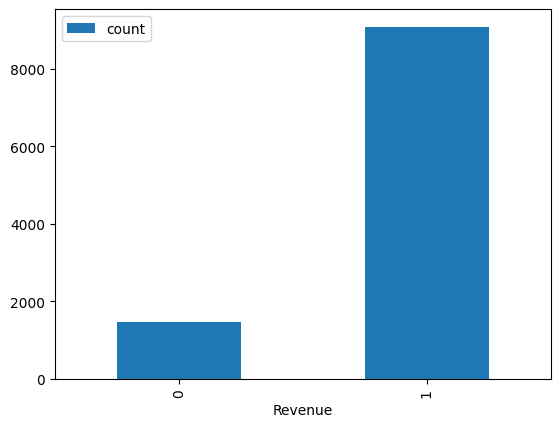

In [95]:
purchase_df = df[df['Revenue'] == 1]

returning_df = df[df['VisitorType'] == 1]

revenue_returning = returning_df.groupby('Revenue')[['Revenue']].value_counts() 


df_rev_returning = revenue_returning.to_frame()

df_rev_returning.plot.bar()
df_rev_returning.sum()


### New Visitor Total Revenue

count    1694
dtype: int64

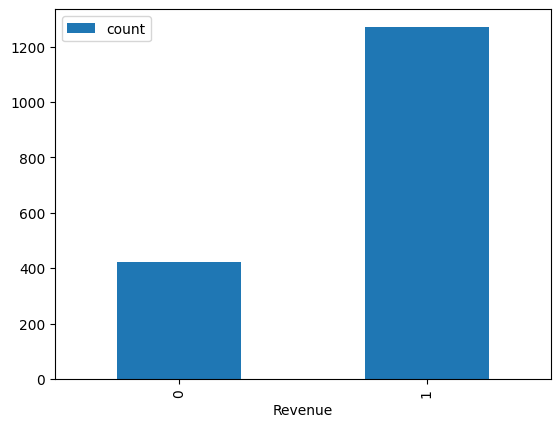

In [90]:
purchase_df = df[df['Revenue'] == 1]

new_df = df[df['VisitorType'] == 2]
 
revenue_new = new_df.groupby('Revenue')[['Revenue']].value_counts()

df_rev_new = revenue_new.to_frame()

df_rev_new.plot.bar()
df_rev_new.sum()

### Other Visitor Total Revenue

count    85
dtype: int64

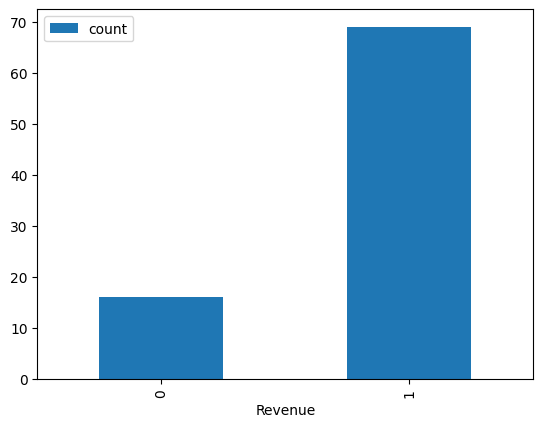

In [91]:
purchase_df = df[df['Revenue'] == 1]

other_df = df[df['VisitorType'] == 0]

revenue_other = other_df.groupby('Revenue')[['Revenue']].value_counts()

df_rev_other = revenue_other.to_frame()
df_rev_other.plot.bar()
df_rev_other.sum()